In [2]:
import numpy as np
from pathlib import Path
import glob
from nilearn.maskers import NiftiMasker
import matplotlib
from nilearn.plotting import view_img, plot_img_on_surf
import seaborn as sns
import matplotlib.pyplot as plt
from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_fslr
from surfplot import Plot

In [3]:
def plot_surf(img, save_path=None, colorbar=True, cmap="cold_hot", vmax=0.8):
    """Plot a seed-based connectivity surface map and save the image."""

    img_data = nib.load(img).get_fdata() if isinstance(img, str) else img.get_fdata()
    img_data = img_data[img_data != 0].flatten()
    plot_img_on_surf(
        img,
        views=["lateral", "medial"],
        hemispheres=["left", "right"],
        inflate=True,
        colorbar=True,
        cmap="turbo",
        vmax=vmax,
        symmetric_cbar=False,
        output_file=save_path,
        resampling_interpolation="nearest"
    )
    
# Load mask
mask_path = "../data/tpl-MNI152NLin2009bSym/tpl-MNI152NLin2009bSym_res-03_atlas-MIST_desc-ATOM_dseg.nii.gz"
masker = NiftiLabelsMasker(mask_path, standardize=True, detrend=True, smoothing_fwhm=0)
masker = masker.fit()

NiftiLabelsMasker(labels_img='/Users/fpaugam/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz')

In [4]:
def make_surf_fig(
    img,
    colorbar=False,
    cmap="cold_hot",
    color_range=(-0.8, 0.8),
    size=(1000, 200),
    n_ticks=3,
    fontsize=10,
    location="top",
    aspect=10,
    pad=0.08,
    shrink=0.8
):
    gii_lh, gii_rh = mni152_to_fslr(img, method="nearest")

    data_lh = gii_lh.agg_data()
    data_rh = gii_rh.agg_data()

    surfaces = fetch_fslr()
    lh, rh = surfaces["inflated"]
    sulc_lh, sulc_rh = surfaces["sulc"]

    p = Plot(lh, rh, size=size, layout="row", mirror_views=True)
    p.add_layer({"left": data_lh, "right": data_rh}, cmap=cmap, color_range=color_range)

    kws = dict(
        location=location,
        draw_border=True,
        aspect=aspect,
        shrink=shrink,
        pad=pad,
        n_ticks=n_ticks,
        fontsize=fontsize,
    )
    fig = p.build(colorbar=colorbar, cbar_kws=kws)

    return fig

../models/RAM_ridge/sub-01_standardscale_randomproj3872_2025-03-10_21h38mn49s/RAM_test_r2.npy
sub-01 RAM 0.09388869883775196 test


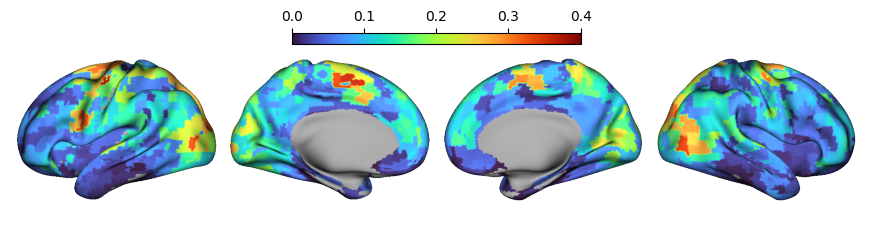

sub-01 PPO 0.10530650427360078 test


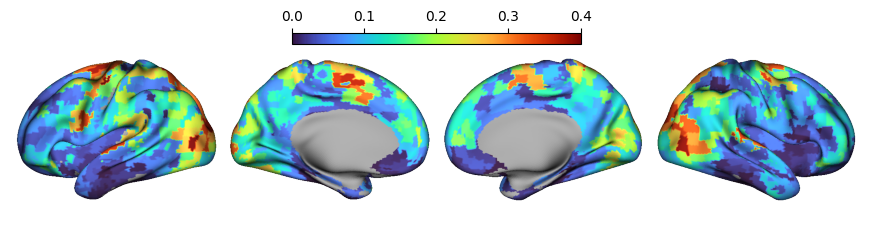

sub-01 Untrained 0.09189802030023497 test


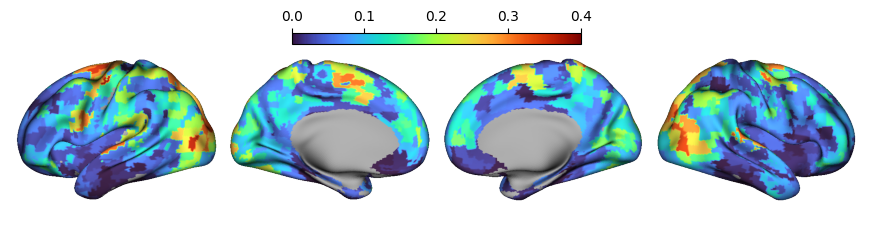

../models/RAM_ridge/sub-02_standardscale_randomproj3872_2025-03-10_21h56mn11s/RAM_test_r2.npy
sub-02 RAM 0.06379445328402152 test


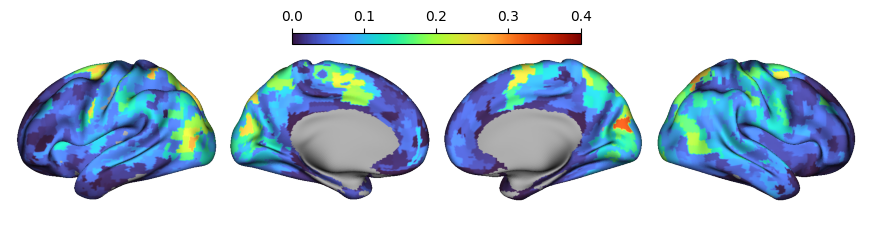

sub-02 PPO 0.07455692479600531 test


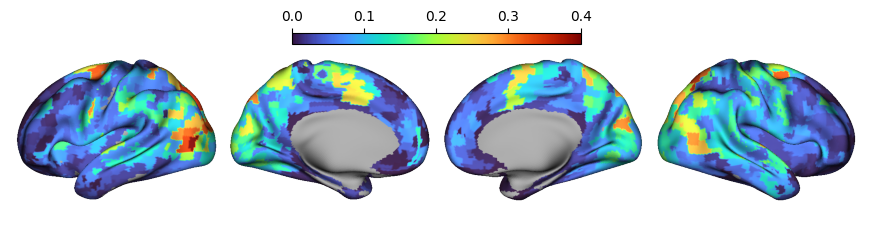

sub-02 Untrained 0.06434871067447474 test


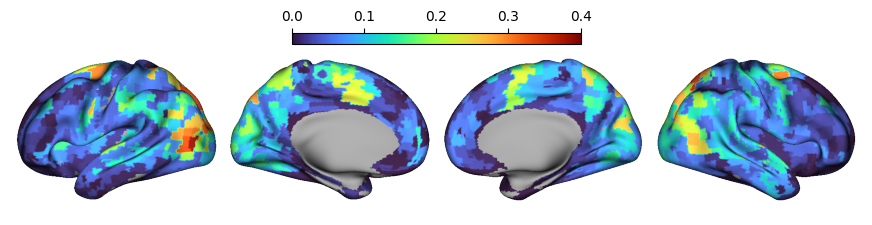

../models/RAM_ridge/sub-03_standardscale_randomproj3872_2025-03-10_22h20mn10s/RAM_test_r2.npy
sub-03 RAM 0.08204819994721065 test


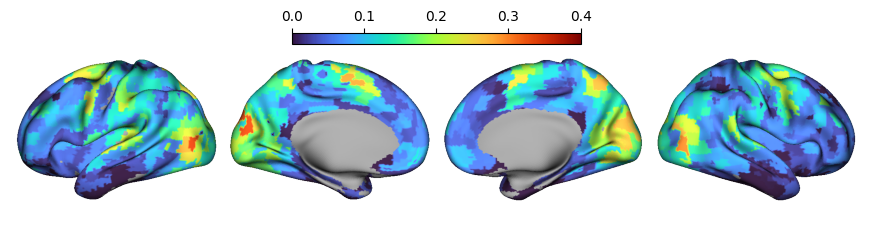

sub-03 PPO 0.08520975937424848 test


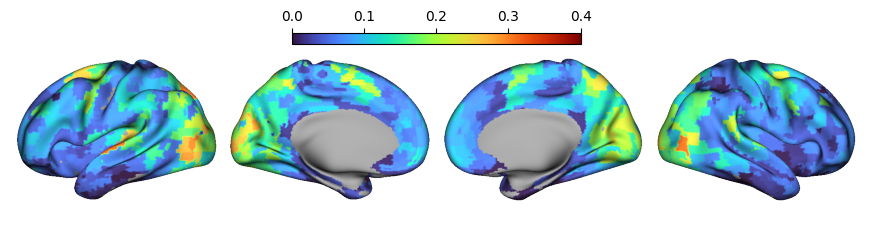

sub-03 Untrained 0.07105101991046663 test


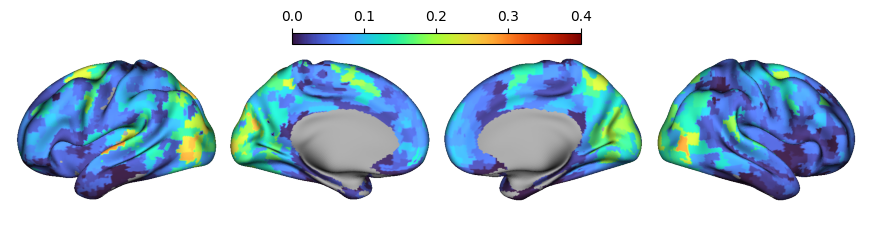

../models/RAM_ridge/sub-05_standardscale_randomproj3872_2025-03-10_22h44mn20s/RAM_test_r2.npy
sub-05 RAM 0.0846044697129353 test


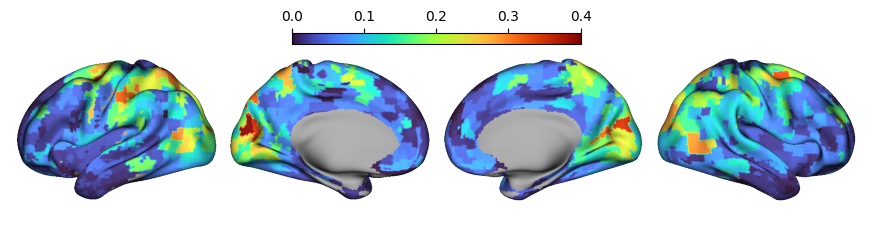

sub-05 PPO 0.08973912847769283 test


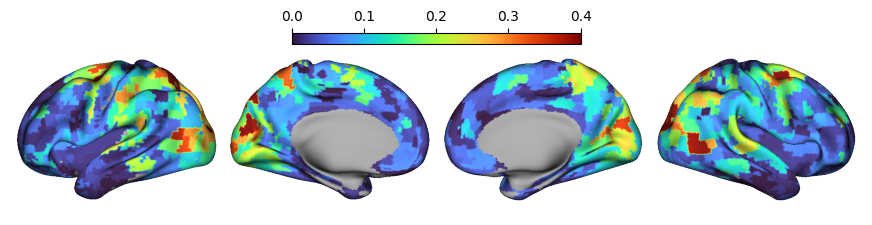

sub-05 Untrained 0.07541059069184786 test


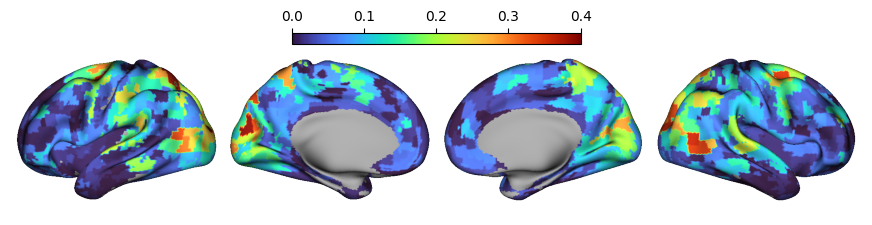

../models/RAM_ridge/sub-06_standardscale_randomproj3872_2025-03-17_10h52mn29s/RAM_test_r2.npy
sub-06 RAM 0.06130299313880878 test


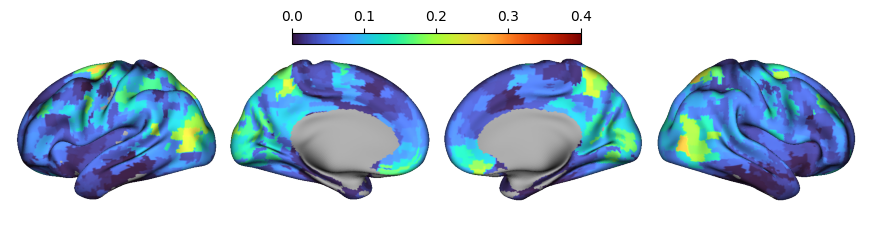

sub-06 PPO 0.059548824674053875 test


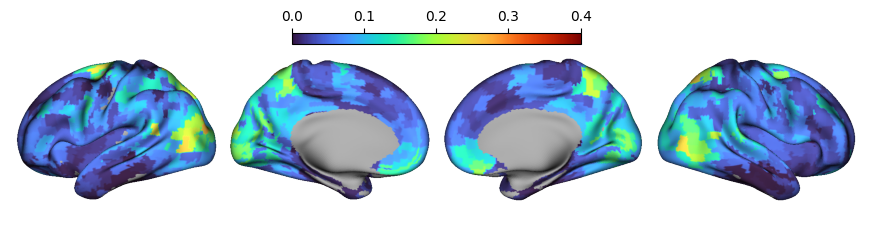

sub-06 Untrained 0.047176149819488554 test


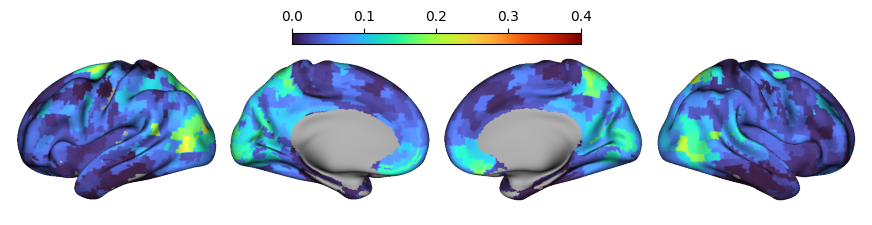

mean RAM 0.07712776298414564 test


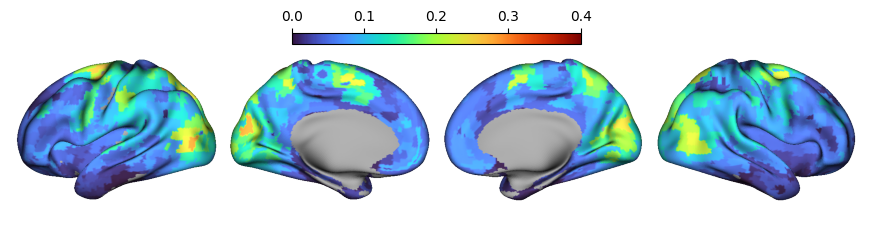

mean PPO 0.08287222831912025 test


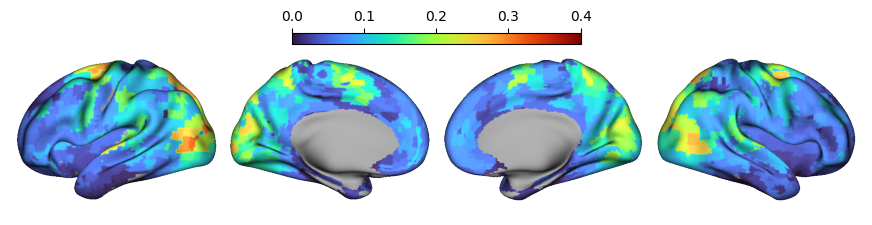

mean Untrained 0.06997689827930255 test


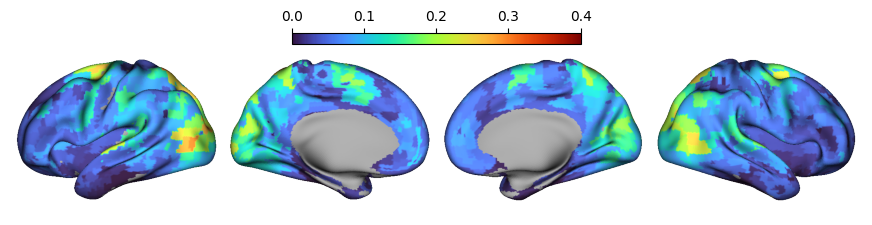

../models/RAM_ridge/sub-01_standardscale_randomproj3872_2025-03-10_21h38mn49s/RAM_ood_r2.npy
sub-01 RAM 0.042779644036588654 ood


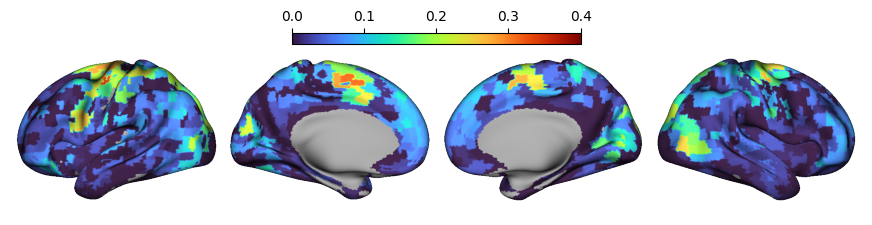

sub-01 PPO 0.06352973302463628 ood


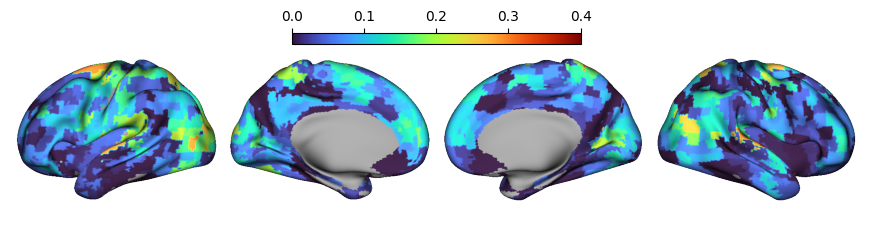

sub-01 Untrained 0.06143679837638676 ood


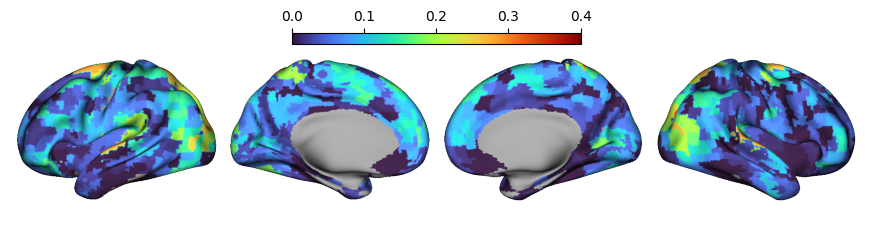

../models/RAM_ridge/sub-02_standardscale_randomproj3872_2025-03-10_21h56mn11s/RAM_ood_r2.npy
sub-02 RAM 0.027790558234415223 ood


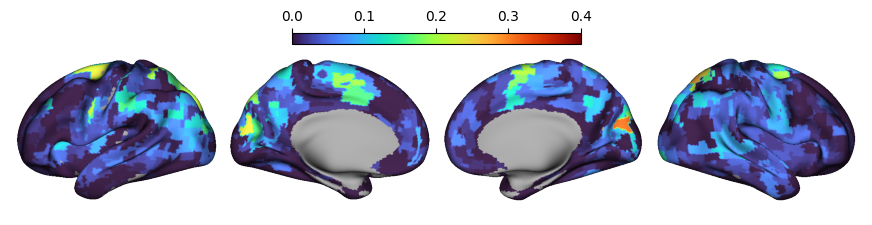

sub-02 PPO 0.03300068000639336 ood


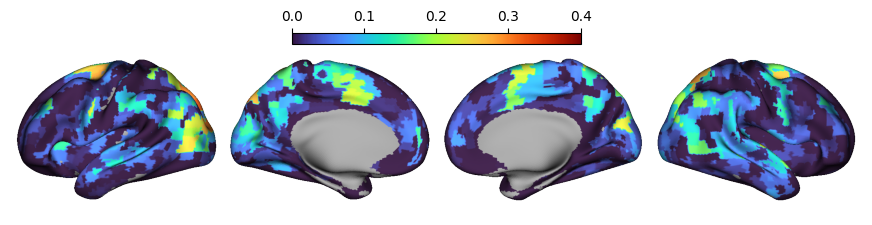

sub-02 Untrained 0.022553206238252008 ood


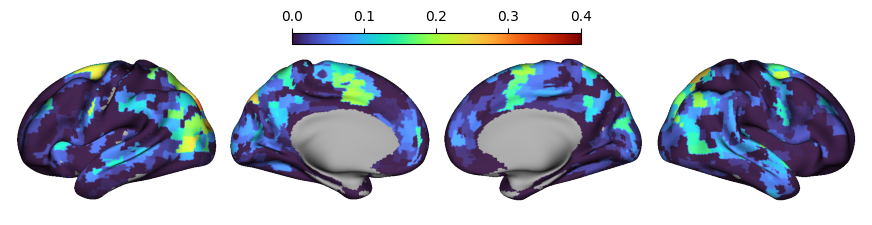

../models/RAM_ridge/sub-03_standardscale_randomproj3872_2025-03-10_22h20mn10s/RAM_ood_r2.npy
sub-03 RAM -0.06162169661372658 ood


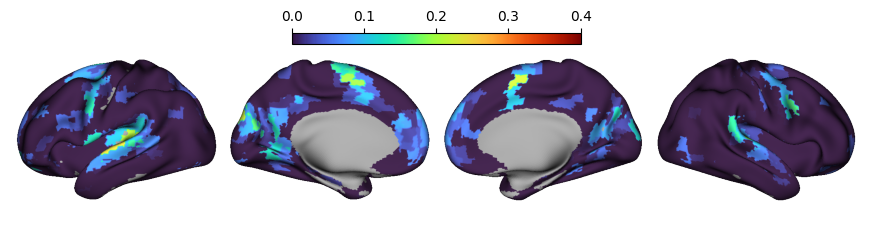

sub-03 PPO 0.034013413096769196 ood


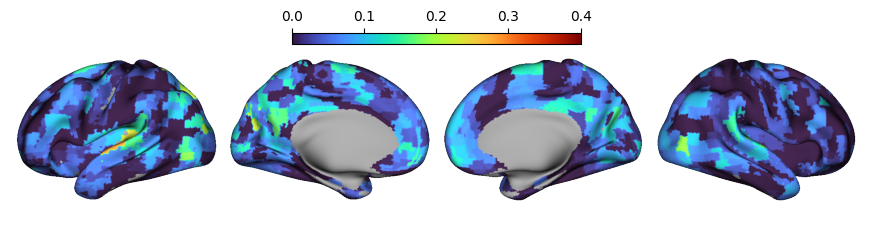

sub-03 Untrained 0.02826881105137689 ood


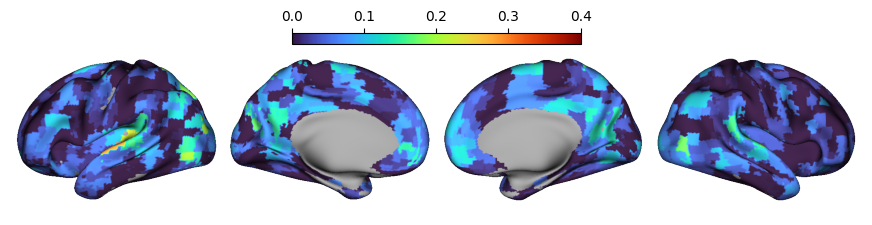

../models/RAM_ridge/sub-05_standardscale_randomproj3872_2025-03-10_22h44mn20s/RAM_ood_r2.npy
sub-05 RAM 0.054032437974157355 ood


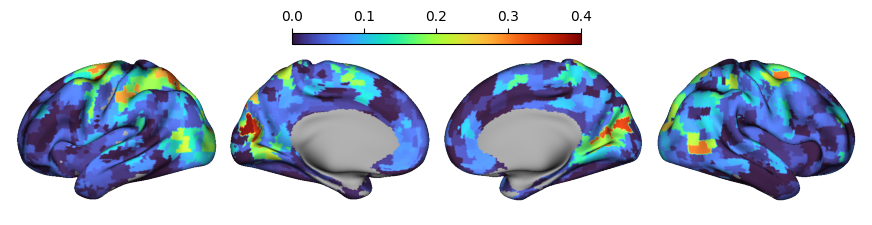

sub-05 PPO 0.05650848847789855 ood


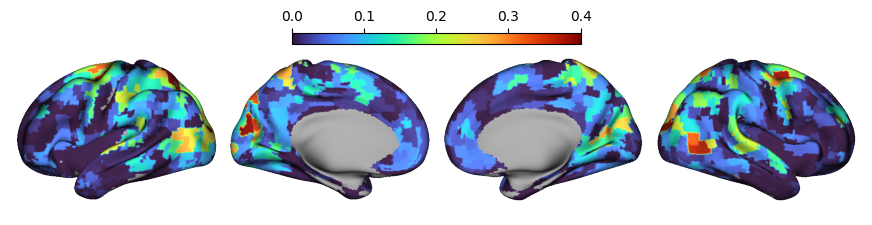

sub-05 Untrained 0.04615161572766249 ood


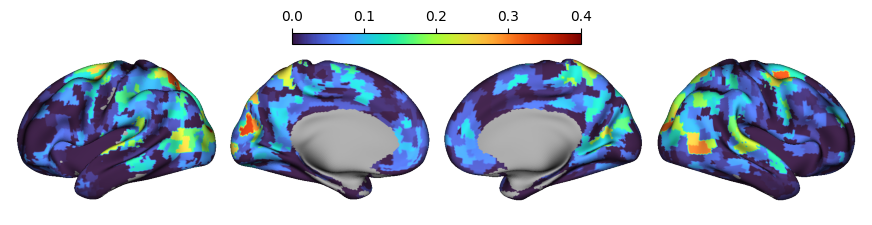

../models/RAM_ridge/sub-06_standardscale_randomproj3872_2025-03-17_10h52mn29s/RAM_ood_r2.npy
sub-06 RAM 0.029730280578344988 ood


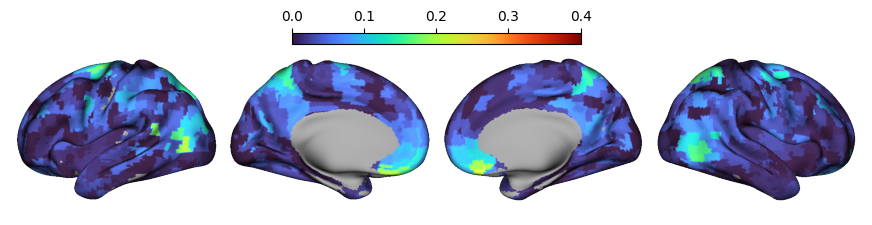

sub-06 PPO 0.019509225573648384 ood


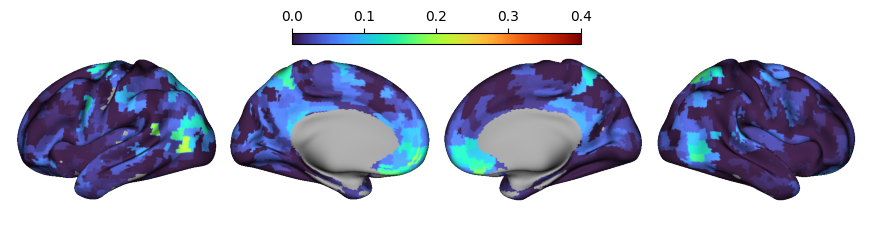

sub-06 Untrained 0.012917835924084246 ood


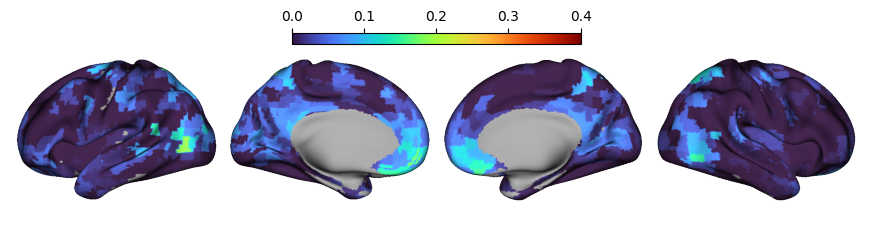

mean RAM 0.09567000782610156 ood


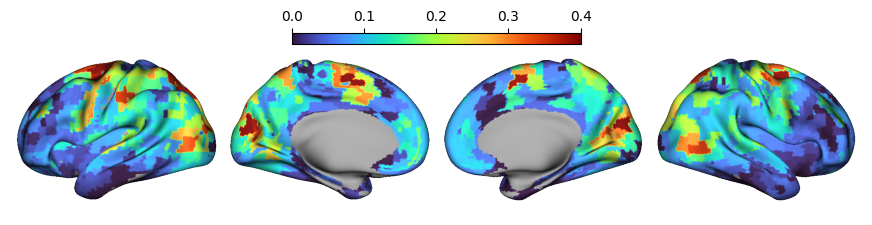

mean PPO 0.1241845363549894 ood


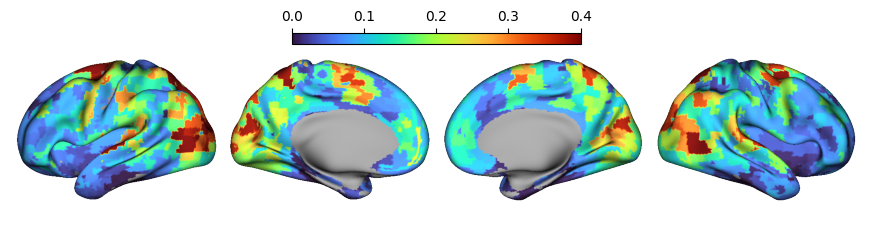

mean Untrained 0.10424255174285503 ood


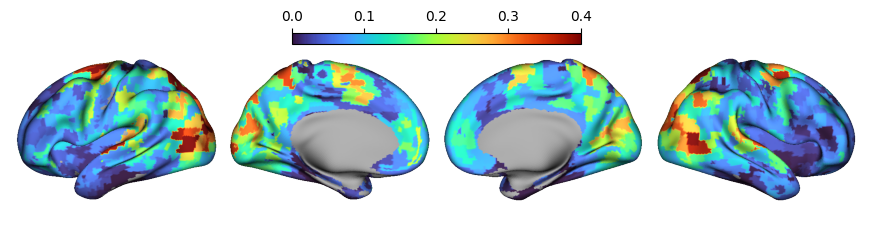

In [5]:
mean_RAM = 0
mean_PPO = 0
mean_UNT = 0
net_names = ["visual", "sensorimotor", "dorsal attention",
             "ventral attention", "limbic", "fronto-parietal",
             "default-mode", "whole brain"]
r2_per_roi = {"subject": [], "ROI": [], "R2": [], "model": [], "dataset": []}
for dataset in ["test", "ood"]:
    for sub in ["sub-01", "sub-02", "sub-03", "sub-05", "sub-06"]:
        path = sorted(glob.glob(f"../models/RAM_ridge/{sub}_*/RAM_{dataset}_r2.npy"))[-1]
        print(path)
        r2 = np.load(path)
        mean_RAM += r2 / 5
        print(sub, "RAM", r2.mean(), dataset)
        r2_map = masker.inverse_transform(r2)
        fig = make_surf_fig(r2_map, color_range=(0, 0.4), colorbar=True, n_ticks=5, aspect=25, pad=0, shrink=1, cmap="turbo")
        plt.show()
        
        path_ppo = glob.glob(f"../models/PPO_ridge/{sub}_ep-7800_*/base.conv3_{dataset}_r2.npy")[-1]
        r2_ppo = np.load(path_ppo)
        mean_PPO += r2_ppo / 5
        print(sub, "PPO", r2_ppo.mean(), dataset)
        r2_map = masker.inverse_transform(r2_ppo)
        fig = make_surf_fig(r2_map, color_range=(0, 0.4), colorbar=True, n_ticks=5, aspect=25, pad=0, shrink=1, cmap="turbo")
        plt.show()
        
        path_untrained = glob.glob(f"../models/Random_ridge/{sub}_random_*/base.conv3_{dataset}_r2.npy")[-1]
        r2_untrained = np.load(path_untrained)
        mean_UNT += r2_untrained / 5
        print(sub, "Untrained", r2_untrained.mean(), dataset)
        r2_map = masker.inverse_transform(r2_untrained)
        fig = make_surf_fig(r2_map, color_range=(0, 0.4), colorbar=True, n_ticks=5, aspect=25, pad=0, shrink=1, cmap="turbo")
        plt.show()

    print("mean RAM", mean_RAM.mean(), dataset)
    r2_map = masker.inverse_transform(mean_RAM)
    fig = make_surf_fig(r2_map, color_range=(0, 0.4), colorbar=True, n_ticks=5, aspect=25, pad=0, shrink=1, cmap="turbo")
    plt.show()
    print("mean PPO", mean_PPO.mean(), dataset)
    r2_map = masker.inverse_transform(mean_PPO)
    fig = make_surf_fig(r2_map, color_range=(0, 0.4), colorbar=True, n_ticks=5, aspect=25, pad=0, shrink=1, cmap="turbo")
    plt.show()
    print("mean Untrained", mean_UNT.mean(), dataset)
    r2_map = masker.inverse_transform(mean_UNT)
    fig = make_surf_fig(r2_map, color_range=(0, 0.4), colorbar=True, n_ticks=5, aspect=25, pad=0, shrink=1, cmap="turbo")
    plt.show()
